In [91]:
import matplotlib.pyplot as plt
import random
import time
import math

def aks(n):
# шаг 1. Проверка, что n - степень какого-либо числа
    tup = isPower(n)
    if tup[0] == True:
        return (f'Число составное, является степенью целого, n: {n} = {int(n**(1/tup[1]))}^{tup[1]}')

# шаг 2. Нахождение наименьшего r
    min_r = find_r(n)

# шаг 3. Проверка 1 < НОД(а,n) < n для a <= r
    for a in range(1, min_r):
        if 1 < gcd(a, n) < n:
            return "Число составное"
        
# шаг 4. Проверка n <= r
    if n <= min_r:
        return "Число простое"

# шаг 5. Проверка условия для a
    n_sage_type = Integers(n)
    R.<x> = PolynomialRing(n_sage_type)
    F = R.quotient((x^min_r)-1)
    for a in range(1, floor(sqrt(euler_phi(min_r))*log(n,2))):
        q = F((x+a))
        V = F(q^n)
        e = Mod(n,min_r)
        d = (x^e)+a
        if (V != d):
            return "Число составное"
    return "Число простое"

def fast_exponentation(a, n):
    """
    Быстрое возведение в степень
    
    """
    ans = 1
    while n:
        if n & 1: ans = ans * a
        a = a * a
        n >>= 1
    return ans


def isPower(n):
    '''
    Проверка, является ли введенное число n = a^b, где a,b>1 и целые
    Бинарный поиск за O(lg n (lg lg n)^2)
    
    '''
    if (n == 1): return [True,0]
    lgn = 1 + (len(bin(abs(n))) - 2)
    for b in range(2, lgn):
        # b lg a = lg n
        lowa = 1
        higha = 1 << (lgn // b + 1)
        while lowa < higha - 1:
            mida = (lowa + higha) >> 1
            ab = fast_exponentation(mida, b)
            if ab > n: higha = mida
            elif ab < n: lowa = mida
            else: 
                return [True,b]  # mida ^ b
    return [False,False]


def ord_an(a, n):
    '''
    Найдем показатель a по модулю n
    
    '''
    if gcd(a, n) != 1:
        return -1


#     result = 1
#     k = 1
#     while (k < n):
#         result = (result * a) % n
#         if (result == 1):
#             return k
#         k = k + 1
#     return -1
    return Mod(a, n).multiplicative_order()


def find_r(n):
    '''
    Найдем наименьшее r такое, что показатель n по модулю r > (log_2(n))^2

    '''
    r = 2
    while True:
        if gcd(r, n) != 1:
            r += 1
        elif ord_an(n, r) > (log(n, 2)) ^ 2:
            break
        else:
            r += 1
    return r

def sage_prime_test(n):
    """
    Результат встроенной функции sage на проверку простоты
    
    """
    c = is_prime(n)
    if c == False:
        return("Согласно sage число составное")
    else:
        return("Согласно sage число простое")

In [16]:
largest_number = 2^13
time_list,primes_list,non_primes_list = [],[],[]
total_number_list = list(range(2,largest_number))
for i in range(2,largest_number):
    start_time = time.time()
    res = aks(i)
    final_time = time.time() - start_time
    time_list.append(final_time)
    if 'простое' in res:
        primes_list.append(i)
    else: non_primes_list.append(i)    
    print(f'Число : {i}. {res}. {sage_prime_test(i)}.')


Число : 2. Число простое. Согласно sage число простое.
Число : 3. Число простое. Согласно sage число простое.
Число : 4. Число составное, является степенью целого, n: 4 = 2^2. Согласно sage число составное.
Число : 5. Число простое. Согласно sage число простое.
Число : 6. Число составное. Согласно sage число составное.
Число : 7. Число простое. Согласно sage число простое.
Число : 8. Число составное, является степенью целого, n: 8 = 2^3. Согласно sage число составное.
Число : 9. Число составное, является степенью целого, n: 9 = 3^2. Согласно sage число составное.
Число : 10. Число составное. Согласно sage число составное.
Число : 11. Число простое. Согласно sage число простое.
Число : 12. Число составное. Согласно sage число составное.
Число : 13. Число простое. Согласно sage число простое.
Число : 14. Число составное. Согласно sage число составное.
Число : 15. Число составное. Согласно sage число составное.
Число : 16. Число составное, является степенью целого, n: 16 = 4^2. Согласно s

Число : 131. Число простое. Согласно sage число простое.
Число : 132. Число составное. Согласно sage число составное.
Число : 133. Число составное. Согласно sage число составное.
Число : 134. Число составное. Согласно sage число составное.
Число : 135. Число составное. Согласно sage число составное.
Число : 136. Число составное. Согласно sage число составное.
Число : 137. Число простое. Согласно sage число простое.
Число : 138. Число составное. Согласно sage число составное.
Число : 139. Число простое. Согласно sage число простое.
Число : 140. Число составное. Согласно sage число составное.
Число : 141. Число составное. Согласно sage число составное.
Число : 142. Число составное. Согласно sage число составное.
Число : 143. Число составное. Согласно sage число составное.
Число : 144. Число составное, является степенью целого, n: 144 = 12^2. Согласно sage число составное.
Число : 145. Число составное. Согласно sage число составное.
Число : 146. Число составное. Согласно sage число состав

Число : 265. Число составное. Согласно sage число составное.
Число : 266. Число составное. Согласно sage число составное.
Число : 267. Число составное. Согласно sage число составное.
Число : 268. Число составное. Согласно sage число составное.
Число : 269. Число простое. Согласно sage число простое.
Число : 270. Число составное. Согласно sage число составное.
Число : 271. Число простое. Согласно sage число простое.
Число : 272. Число составное. Согласно sage число составное.
Число : 273. Число составное. Согласно sage число составное.
Число : 274. Число составное. Согласно sage число составное.
Число : 275. Число составное. Согласно sage число составное.
Число : 276. Число составное. Согласно sage число составное.
Число : 277. Число простое. Согласно sage число простое.
Число : 278. Число составное. Согласно sage число составное.
Число : 279. Число составное. Согласно sage число составное.
Число : 280. Число составное. Согласно sage число составное.
Число : 281. Число простое. Согласно

Число : 401. Число простое. Согласно sage число простое.
Число : 402. Число составное. Согласно sage число составное.
Число : 403. Число составное. Согласно sage число составное.
Число : 404. Число составное. Согласно sage число составное.
Число : 405. Число составное. Согласно sage число составное.
Число : 406. Число составное. Согласно sage число составное.
Число : 407. Число составное. Согласно sage число составное.
Число : 408. Число составное. Согласно sage число составное.
Число : 409. Число простое. Согласно sage число простое.
Число : 410. Число составное. Согласно sage число составное.
Число : 411. Число составное. Согласно sage число составное.
Число : 412. Число составное. Согласно sage число составное.
Число : 413. Число составное. Согласно sage число составное.
Число : 414. Число составное. Согласно sage число составное.
Число : 415. Число составное. Согласно sage число составное.
Число : 416. Число составное. Согласно sage число составное.
Число : 417. Число составное. Со

Число : 535. Число составное. Согласно sage число составное.
Число : 536. Число составное. Согласно sage число составное.
Число : 537. Число составное. Согласно sage число составное.
Число : 538. Число составное. Согласно sage число составное.
Число : 539. Число составное. Согласно sage число составное.
Число : 540. Число составное. Согласно sage число составное.
Число : 541. Число простое. Согласно sage число простое.
Число : 542. Число составное. Согласно sage число составное.
Число : 543. Число составное. Согласно sage число составное.
Число : 544. Число составное. Согласно sage число составное.
Число : 545. Число составное. Согласно sage число составное.
Число : 546. Число составное. Согласно sage число составное.
Число : 547. Число простое. Согласно sage число простое.
Число : 548. Число составное. Согласно sage число составное.
Число : 549. Число составное. Согласно sage число составное.
Число : 550. Число составное. Согласно sage число составное.
Число : 551. Число составное. Со

Число : 670. Число составное. Согласно sage число составное.
Число : 671. Число составное. Согласно sage число составное.
Число : 672. Число составное. Согласно sage число составное.
Число : 673. Число простое. Согласно sage число простое.
Число : 674. Число составное. Согласно sage число составное.
Число : 675. Число составное. Согласно sage число составное.
Число : 676. Число составное, является степенью целого, n: 676 = 26^2. Согласно sage число составное.
Число : 677. Число простое. Согласно sage число простое.
Число : 678. Число составное. Согласно sage число составное.
Число : 679. Число составное. Согласно sage число составное.
Число : 680. Число составное. Согласно sage число составное.
Число : 681. Число составное. Согласно sage число составное.
Число : 682. Число составное. Согласно sage число составное.
Число : 683. Число простое. Согласно sage число простое.
Число : 684. Число составное. Согласно sage число составное.
Число : 685. Число составное. Согласно sage число состав

Число : 806. Число составное. Согласно sage число составное.
Число : 807. Число составное. Согласно sage число составное.
Число : 808. Число составное. Согласно sage число составное.
Число : 809. Число простое. Согласно sage число простое.
Число : 810. Число составное. Согласно sage число составное.
Число : 811. Число простое. Согласно sage число простое.
Число : 812. Число составное. Согласно sage число составное.
Число : 813. Число составное. Согласно sage число составное.
Число : 814. Число составное. Согласно sage число составное.
Число : 815. Число составное. Согласно sage число составное.
Число : 816. Число составное. Согласно sage число составное.
Число : 817. Число составное. Согласно sage число составное.
Число : 818. Число составное. Согласно sage число составное.
Число : 819. Число составное. Согласно sage число составное.
Число : 820. Число составное. Согласно sage число составное.
Число : 821. Число простое. Согласно sage число простое.
Число : 822. Число составное. Соглас

Число : 941. Число простое. Согласно sage число простое.
Число : 942. Число составное. Согласно sage число составное.
Число : 943. Число составное. Согласно sage число составное.
Число : 944. Число составное. Согласно sage число составное.
Число : 945. Число составное. Согласно sage число составное.
Число : 946. Число составное. Согласно sage число составное.
Число : 947. Число простое. Согласно sage число простое.
Число : 948. Число составное. Согласно sage число составное.
Число : 949. Число составное. Согласно sage число составное.
Число : 950. Число составное. Согласно sage число составное.
Число : 951. Число составное. Согласно sage число составное.
Число : 952. Число составное. Согласно sage число составное.
Число : 953. Число простое. Согласно sage число простое.
Число : 954. Число составное. Согласно sage число составное.
Число : 955. Число составное. Согласно sage число составное.
Число : 956. Число составное. Согласно sage число составное.
Число : 957. Число составное. Соглас

Число : 1075. Число составное. Согласно sage число составное.
Число : 1076. Число составное. Согласно sage число составное.
Число : 1077. Число составное. Согласно sage число составное.
Число : 1078. Число составное. Согласно sage число составное.
Число : 1079. Число составное. Согласно sage число составное.
Число : 1080. Число составное. Согласно sage число составное.
Число : 1081. Число составное. Согласно sage число составное.
Число : 1082. Число составное. Согласно sage число составное.
Число : 1083. Число составное. Согласно sage число составное.
Число : 1084. Число составное. Согласно sage число составное.
Число : 1085. Число составное. Согласно sage число составное.
Число : 1086. Число составное. Согласно sage число составное.
Число : 1087. Число простое. Согласно sage число простое.
Число : 1088. Число составное. Согласно sage число составное.
Число : 1089. Число составное, является степенью целого, n: 1089 = 33^2. Согласно sage число составное.
Число : 1090. Число составное. С

Число : 1207. Число составное. Согласно sage число составное.
Число : 1208. Число составное. Согласно sage число составное.
Число : 1209. Число составное. Согласно sage число составное.
Число : 1210. Число составное. Согласно sage число составное.
Число : 1211. Число составное. Согласно sage число составное.
Число : 1212. Число составное. Согласно sage число составное.
Число : 1213. Число простое. Согласно sage число простое.
Число : 1214. Число составное. Согласно sage число составное.
Число : 1215. Число составное. Согласно sage число составное.
Число : 1216. Число составное. Согласно sage число составное.
Число : 1217. Число простое. Согласно sage число простое.
Число : 1218. Число составное. Согласно sage число составное.
Число : 1219. Число составное. Согласно sage число составное.
Число : 1220. Число составное. Согласно sage число составное.
Число : 1221. Число составное. Согласно sage число составное.
Число : 1222. Число составное. Согласно sage число составное.
Число : 1223. Чи

Число : 1339. Число составное. Согласно sage число составное.
Число : 1340. Число составное. Согласно sage число составное.
Число : 1341. Число составное. Согласно sage число составное.
Число : 1342. Число составное. Согласно sage число составное.
Число : 1343. Число составное. Согласно sage число составное.
Число : 1344. Число составное. Согласно sage число составное.
Число : 1345. Число составное. Согласно sage число составное.
Число : 1346. Число составное. Согласно sage число составное.
Число : 1347. Число составное. Согласно sage число составное.
Число : 1348. Число составное. Согласно sage число составное.
Число : 1349. Число составное. Согласно sage число составное.
Число : 1350. Число составное. Согласно sage число составное.
Число : 1351. Число составное. Согласно sage число составное.
Число : 1352. Число составное. Согласно sage число составное.
Число : 1353. Число составное. Согласно sage число составное.
Число : 1354. Число составное. Согласно sage число составное.
Число : 

Число : 1471. Число простое. Согласно sage число простое.
Число : 1472. Число составное. Согласно sage число составное.
Число : 1473. Число составное. Согласно sage число составное.
Число : 1474. Число составное. Согласно sage число составное.
Число : 1475. Число составное. Согласно sage число составное.
Число : 1476. Число составное. Согласно sage число составное.
Число : 1477. Число составное. Согласно sage число составное.
Число : 1478. Число составное. Согласно sage число составное.
Число : 1479. Число составное. Согласно sage число составное.
Число : 1480. Число составное. Согласно sage число составное.
Число : 1481. Число простое. Согласно sage число простое.
Число : 1482. Число составное. Согласно sage число составное.
Число : 1483. Число простое. Согласно sage число простое.
Число : 1484. Число составное. Согласно sage число составное.
Число : 1485. Число составное. Согласно sage число составное.
Число : 1486. Число составное. Согласно sage число составное.
Число : 1487. Число 

Число : 1604. Число составное. Согласно sage число составное.
Число : 1605. Число составное. Согласно sage число составное.
Число : 1606. Число составное. Согласно sage число составное.
Число : 1607. Число простое. Согласно sage число простое.
Число : 1608. Число составное. Согласно sage число составное.
Число : 1609. Число простое. Согласно sage число простое.
Число : 1610. Число составное. Согласно sage число составное.
Число : 1611. Число составное. Согласно sage число составное.
Число : 1612. Число составное. Согласно sage число составное.
Число : 1613. Число простое. Согласно sage число простое.
Число : 1614. Число составное. Согласно sage число составное.
Число : 1615. Число составное. Согласно sage число составное.
Число : 1616. Число составное. Согласно sage число составное.
Число : 1617. Число составное. Согласно sage число составное.
Число : 1618. Число составное. Согласно sage число составное.
Число : 1619. Число простое. Согласно sage число простое.
Число : 1620. Число сост

Число : 1737. Число составное. Согласно sage число составное.
Число : 1738. Число составное. Согласно sage число составное.
Число : 1739. Число составное. Согласно sage число составное.
Число : 1740. Число составное. Согласно sage число составное.
Число : 1741. Число простое. Согласно sage число простое.
Число : 1742. Число составное. Согласно sage число составное.
Число : 1743. Число составное. Согласно sage число составное.
Число : 1744. Число составное. Согласно sage число составное.
Число : 1745. Число составное. Согласно sage число составное.
Число : 1746. Число составное. Согласно sage число составное.
Число : 1747. Число простое. Согласно sage число простое.
Число : 1748. Число составное. Согласно sage число составное.
Число : 1749. Число составное. Согласно sage число составное.
Число : 1750. Число составное. Согласно sage число составное.
Число : 1751. Число составное. Согласно sage число составное.
Число : 1752. Число составное. Согласно sage число составное.
Число : 1753. Чи

Число : 1870. Число составное. Согласно sage число составное.
Число : 1871. Число простое. Согласно sage число простое.
Число : 1872. Число составное. Согласно sage число составное.
Число : 1873. Число простое. Согласно sage число простое.
Число : 1874. Число составное. Согласно sage число составное.
Число : 1875. Число составное. Согласно sage число составное.
Число : 1876. Число составное. Согласно sage число составное.
Число : 1877. Число простое. Согласно sage число простое.
Число : 1878. Число составное. Согласно sage число составное.
Число : 1879. Число простое. Согласно sage число простое.
Число : 1880. Число составное. Согласно sage число составное.
Число : 1881. Число составное. Согласно sage число составное.
Число : 1882. Число составное. Согласно sage число составное.
Число : 1883. Число составное. Согласно sage число составное.
Число : 1884. Число составное. Согласно sage число составное.
Число : 1885. Число составное. Согласно sage число составное.
Число : 1886. Число сост

Число : 2004. Число составное. Согласно sage число составное.
Число : 2005. Число составное. Согласно sage число составное.
Число : 2006. Число составное. Согласно sage число составное.
Число : 2007. Число составное. Согласно sage число составное.
Число : 2008. Число составное. Согласно sage число составное.
Число : 2009. Число составное. Согласно sage число составное.
Число : 2010. Число составное. Согласно sage число составное.
Число : 2011. Число простое. Согласно sage число простое.
Число : 2012. Число составное. Согласно sage число составное.
Число : 2013. Число составное. Согласно sage число составное.
Число : 2014. Число составное. Согласно sage число составное.
Число : 2015. Число составное. Согласно sage число составное.
Число : 2016. Число составное. Согласно sage число составное.
Число : 2017. Число простое. Согласно sage число простое.
Число : 2018. Число составное. Согласно sage число составное.
Число : 2019. Число составное. Согласно sage число составное.
Число : 2020. Чи

Число : 2137. Число простое. Согласно sage число простое.
Число : 2138. Число составное. Согласно sage число составное.
Число : 2139. Число составное. Согласно sage число составное.
Число : 2140. Число составное. Согласно sage число составное.
Число : 2141. Число простое. Согласно sage число простое.
Число : 2142. Число составное. Согласно sage число составное.
Число : 2143. Число простое. Согласно sage число простое.
Число : 2144. Число составное. Согласно sage число составное.
Число : 2145. Число составное. Согласно sage число составное.
Число : 2146. Число составное. Согласно sage число составное.
Число : 2147. Число составное. Согласно sage число составное.
Число : 2148. Число составное. Согласно sage число составное.
Число : 2149. Число составное. Согласно sage число составное.
Число : 2150. Число составное. Согласно sage число составное.
Число : 2151. Число составное. Согласно sage число составное.
Число : 2152. Число составное. Согласно sage число составное.
Число : 2153. Число 

Число : 2269. Число простое. Согласно sage число простое.
Число : 2270. Число составное. Согласно sage число составное.
Число : 2271. Число составное. Согласно sage число составное.
Число : 2272. Число составное. Согласно sage число составное.
Число : 2273. Число простое. Согласно sage число простое.
Число : 2274. Число составное. Согласно sage число составное.
Число : 2275. Число составное. Согласно sage число составное.
Число : 2276. Число составное. Согласно sage число составное.
Число : 2277. Число составное. Согласно sage число составное.
Число : 2278. Число составное. Согласно sage число составное.
Число : 2279. Число составное. Согласно sage число составное.
Число : 2280. Число составное. Согласно sage число составное.
Число : 2281. Число простое. Согласно sage число простое.
Число : 2282. Число составное. Согласно sage число составное.
Число : 2283. Число составное. Согласно sage число составное.
Число : 2284. Число составное. Согласно sage число составное.
Число : 2285. Число 

Число : 2404. Число составное. Согласно sage число составное.
Число : 2405. Число составное. Согласно sage число составное.
Число : 2406. Число составное. Согласно sage число составное.
Число : 2407. Число составное. Согласно sage число составное.
Число : 2408. Число составное. Согласно sage число составное.
Число : 2409. Число составное. Согласно sage число составное.
Число : 2410. Число составное. Согласно sage число составное.
Число : 2411. Число простое. Согласно sage число простое.
Число : 2412. Число составное. Согласно sage число составное.
Число : 2413. Число составное. Согласно sage число составное.
Число : 2414. Число составное. Согласно sage число составное.
Число : 2415. Число составное. Согласно sage число составное.
Число : 2416. Число составное. Согласно sage число составное.
Число : 2417. Число простое. Согласно sage число простое.
Число : 2418. Число составное. Согласно sage число составное.
Число : 2419. Число составное. Согласно sage число составное.
Число : 2420. Чи

Число : 2537. Число составное. Согласно sage число составное.
Число : 2538. Число составное. Согласно sage число составное.
Число : 2539. Число простое. Согласно sage число простое.
Число : 2540. Число составное. Согласно sage число составное.
Число : 2541. Число составное. Согласно sage число составное.
Число : 2542. Число составное. Согласно sage число составное.
Число : 2543. Число простое. Согласно sage число простое.
Число : 2544. Число составное. Согласно sage число составное.
Число : 2545. Число составное. Согласно sage число составное.
Число : 2546. Число составное. Согласно sage число составное.
Число : 2547. Число составное. Согласно sage число составное.
Число : 2548. Число составное. Согласно sage число составное.
Число : 2549. Число простое. Согласно sage число простое.
Число : 2550. Число составное. Согласно sage число составное.
Число : 2551. Число простое. Согласно sage число простое.
Число : 2552. Число составное. Согласно sage число составное.
Число : 2553. Число сост

Число : 2671. Число простое. Согласно sage число простое.
Число : 2672. Число составное. Согласно sage число составное.
Число : 2673. Число составное. Согласно sage число составное.
Число : 2674. Число составное. Согласно sage число составное.
Число : 2675. Число составное. Согласно sage число составное.
Число : 2676. Число составное. Согласно sage число составное.
Число : 2677. Число простое. Согласно sage число простое.
Число : 2678. Число составное. Согласно sage число составное.
Число : 2679. Число составное. Согласно sage число составное.
Число : 2680. Число составное. Согласно sage число составное.
Число : 2681. Число составное. Согласно sage число составное.
Число : 2682. Число составное. Согласно sage число составное.
Число : 2683. Число простое. Согласно sage число простое.
Число : 2684. Число составное. Согласно sage число составное.
Число : 2685. Число составное. Согласно sage число составное.
Число : 2686. Число составное. Согласно sage число составное.
Число : 2687. Число 

Число : 2806. Число составное. Согласно sage число составное.
Число : 2807. Число составное. Согласно sage число составное.
Число : 2808. Число составное. Согласно sage число составное.
Число : 2809. Число составное, является степенью целого, n: 2809 = 53^2. Согласно sage число составное.
Число : 2810. Число составное. Согласно sage число составное.
Число : 2811. Число составное. Согласно sage число составное.
Число : 2812. Число составное. Согласно sage число составное.
Число : 2813. Число составное. Согласно sage число составное.
Число : 2814. Число составное. Согласно sage число составное.
Число : 2815. Число составное. Согласно sage число составное.
Число : 2816. Число составное. Согласно sage число составное.
Число : 2817. Число составное. Согласно sage число составное.
Число : 2818. Число составное. Согласно sage число составное.
Число : 2819. Число простое. Согласно sage число простое.
Число : 2820. Число составное. Согласно sage число составное.
Число : 2821. Число составное. С

Число : 2939. Число простое. Согласно sage число простое.
Число : 2940. Число составное. Согласно sage число составное.
Число : 2941. Число составное. Согласно sage число составное.
Число : 2942. Число составное. Согласно sage число составное.
Число : 2943. Число составное. Согласно sage число составное.
Число : 2944. Число составное. Согласно sage число составное.
Число : 2945. Число составное. Согласно sage число составное.
Число : 2946. Число составное. Согласно sage число составное.
Число : 2947. Число составное. Согласно sage число составное.
Число : 2948. Число составное. Согласно sage число составное.
Число : 2949. Число составное. Согласно sage число составное.
Число : 2950. Число составное. Согласно sage число составное.
Число : 2951. Число составное. Согласно sage число составное.
Число : 2952. Число составное. Согласно sage число составное.
Число : 2953. Число простое. Согласно sage число простое.
Число : 2954. Число составное. Согласно sage число составное.
Число : 2955. Чи

Число : 3073. Число составное. Согласно sage число составное.
Число : 3074. Число составное. Согласно sage число составное.
Число : 3075. Число составное. Согласно sage число составное.
Число : 3076. Число составное. Согласно sage число составное.
Число : 3077. Число составное. Согласно sage число составное.
Число : 3078. Число составное. Согласно sage число составное.
Число : 3079. Число простое. Согласно sage число простое.
Число : 3080. Число составное. Согласно sage число составное.
Число : 3081. Число составное. Согласно sage число составное.
Число : 3082. Число составное. Согласно sage число составное.
Число : 3083. Число простое. Согласно sage число простое.
Число : 3084. Число составное. Согласно sage число составное.
Число : 3085. Число составное. Согласно sage число составное.
Число : 3086. Число составное. Согласно sage число составное.
Число : 3087. Число составное. Согласно sage число составное.
Число : 3088. Число составное. Согласно sage число составное.
Число : 3089. Чи

Число : 3205. Число составное. Согласно sage число составное.
Число : 3206. Число составное. Согласно sage число составное.
Число : 3207. Число составное. Согласно sage число составное.
Число : 3208. Число составное. Согласно sage число составное.
Число : 3209. Число простое. Согласно sage число простое.
Число : 3210. Число составное. Согласно sage число составное.
Число : 3211. Число составное. Согласно sage число составное.
Число : 3212. Число составное. Согласно sage число составное.
Число : 3213. Число составное. Согласно sage число составное.
Число : 3214. Число составное. Согласно sage число составное.
Число : 3215. Число составное. Согласно sage число составное.
Число : 3216. Число составное. Согласно sage число составное.
Число : 3217. Число простое. Согласно sage число простое.
Число : 3218. Число составное. Согласно sage число составное.
Число : 3219. Число составное. Согласно sage число составное.
Число : 3220. Число составное. Согласно sage число составное.
Число : 3221. Чи

Число : 3338. Число составное. Согласно sage число составное.
Число : 3339. Число составное. Согласно sage число составное.
Число : 3340. Число составное. Согласно sage число составное.
Число : 3341. Число составное. Согласно sage число составное.
Число : 3342. Число составное. Согласно sage число составное.
Число : 3343. Число простое. Согласно sage число простое.
Число : 3344. Число составное. Согласно sage число составное.
Число : 3345. Число составное. Согласно sage число составное.
Число : 3346. Число составное. Согласно sage число составное.
Число : 3347. Число простое. Согласно sage число простое.
Число : 3348. Число составное. Согласно sage число составное.
Число : 3349. Число составное. Согласно sage число составное.
Число : 3350. Число составное. Согласно sage число составное.
Число : 3351. Число составное. Согласно sage число составное.
Число : 3352. Число составное. Согласно sage число составное.
Число : 3353. Число составное. Согласно sage число составное.
Число : 3354. Чи

Число : 3470. Число составное. Согласно sage число составное.
Число : 3471. Число составное. Согласно sage число составное.
Число : 3472. Число составное. Согласно sage число составное.
Число : 3473. Число составное. Согласно sage число составное.
Число : 3474. Число составное. Согласно sage число составное.
Число : 3475. Число составное. Согласно sage число составное.
Число : 3476. Число составное. Согласно sage число составное.
Число : 3477. Число составное. Согласно sage число составное.
Число : 3478. Число составное. Согласно sage число составное.
Число : 3479. Число составное. Согласно sage число составное.
Число : 3480. Число составное. Согласно sage число составное.
Число : 3481. Число составное, является степенью целого, n: 3481 = 59^2. Согласно sage число составное.
Число : 3482. Число составное. Согласно sage число составное.
Число : 3483. Число составное. Согласно sage число составное.
Число : 3484. Число составное. Согласно sage число составное.
Число : 3485. Число составно

Число : 3603. Число составное. Согласно sage число составное.
Число : 3604. Число составное. Согласно sage число составное.
Число : 3605. Число составное. Согласно sage число составное.
Число : 3606. Число составное. Согласно sage число составное.
Число : 3607. Число простое. Согласно sage число простое.
Число : 3608. Число составное. Согласно sage число составное.
Число : 3609. Число составное. Согласно sage число составное.
Число : 3610. Число составное. Согласно sage число составное.
Число : 3611. Число составное. Согласно sage число составное.
Число : 3612. Число составное. Согласно sage число составное.
Число : 3613. Число простое. Согласно sage число простое.
Число : 3614. Число составное. Согласно sage число составное.
Число : 3615. Число составное. Согласно sage число составное.
Число : 3616. Число составное. Согласно sage число составное.
Число : 3617. Число простое. Согласно sage число простое.
Число : 3618. Число составное. Согласно sage число составное.
Число : 3619. Число 

Число : 3736. Число составное. Согласно sage число составное.
Число : 3737. Число составное. Согласно sage число составное.
Число : 3738. Число составное. Согласно sage число составное.
Число : 3739. Число простое. Согласно sage число простое.
Число : 3740. Число составное. Согласно sage число составное.
Число : 3741. Число составное. Согласно sage число составное.
Число : 3742. Число составное. Согласно sage число составное.
Число : 3743. Число составное. Согласно sage число составное.
Число : 3744. Число составное. Согласно sage число составное.
Число : 3745. Число составное. Согласно sage число составное.
Число : 3746. Число составное. Согласно sage число составное.
Число : 3747. Число составное. Согласно sage число составное.
Число : 3748. Число составное. Согласно sage число составное.
Число : 3749. Число составное. Согласно sage число составное.
Число : 3750. Число составное. Согласно sage число составное.
Число : 3751. Число составное. Согласно sage число составное.
Число : 3752

Число : 3869. Число составное. Согласно sage число составное.
Число : 3870. Число составное. Согласно sage число составное.
Число : 3871. Число составное. Согласно sage число составное.
Число : 3872. Число составное. Согласно sage число составное.
Число : 3873. Число составное. Согласно sage число составное.
Число : 3874. Число составное. Согласно sage число составное.
Число : 3875. Число составное. Согласно sage число составное.
Число : 3876. Число составное. Согласно sage число составное.
Число : 3877. Число простое. Согласно sage число простое.
Число : 3878. Число составное. Согласно sage число составное.
Число : 3879. Число составное. Согласно sage число составное.
Число : 3880. Число составное. Согласно sage число составное.
Число : 3881. Число простое. Согласно sage число простое.
Число : 3882. Число составное. Согласно sage число составное.
Число : 3883. Число составное. Согласно sage число составное.
Число : 3884. Число составное. Согласно sage число составное.
Число : 3885. Чи

Число : 4003. Число простое. Согласно sage число простое.
Число : 4004. Число составное. Согласно sage число составное.
Число : 4005. Число составное. Согласно sage число составное.
Число : 4006. Число составное. Согласно sage число составное.
Число : 4007. Число простое. Согласно sage число простое.
Число : 4008. Число составное. Согласно sage число составное.
Число : 4009. Число составное. Согласно sage число составное.
Число : 4010. Число составное. Согласно sage число составное.
Число : 4011. Число составное. Согласно sage число составное.
Число : 4012. Число составное. Согласно sage число составное.
Число : 4013. Число простое. Согласно sage число простое.
Число : 4014. Число составное. Согласно sage число составное.
Число : 4015. Число составное. Согласно sage число составное.
Число : 4016. Число составное. Согласно sage число составное.
Число : 4017. Число составное. Согласно sage число составное.
Число : 4018. Число составное. Согласно sage число составное.
Число : 4019. Число 

Число : 4136. Число составное. Согласно sage число составное.
Число : 4137. Число составное. Согласно sage число составное.
Число : 4138. Число составное. Согласно sage число составное.
Число : 4139. Число простое. Согласно sage число простое.
Число : 4140. Число составное. Согласно sage число составное.
Число : 4141. Число составное. Согласно sage число составное.
Число : 4142. Число составное. Согласно sage число составное.
Число : 4143. Число составное. Согласно sage число составное.
Число : 4144. Число составное. Согласно sage число составное.
Число : 4145. Число составное. Согласно sage число составное.
Число : 4146. Число составное. Согласно sage число составное.
Число : 4147. Число составное. Согласно sage число составное.
Число : 4148. Число составное. Согласно sage число составное.
Число : 4149. Число составное. Согласно sage число составное.
Число : 4150. Число составное. Согласно sage число составное.
Число : 4151. Число составное. Согласно sage число составное.
Число : 4152

Число : 4271. Число простое. Согласно sage число простое.
Число : 4272. Число составное. Согласно sage число составное.
Число : 4273. Число простое. Согласно sage число простое.
Число : 4274. Число составное. Согласно sage число составное.
Число : 4275. Число составное. Согласно sage число составное.
Число : 4276. Число составное. Согласно sage число составное.
Число : 4277. Число составное. Согласно sage число составное.
Число : 4278. Число составное. Согласно sage число составное.
Число : 4279. Число составное. Согласно sage число составное.
Число : 4280. Число составное. Согласно sage число составное.
Число : 4281. Число составное. Согласно sage число составное.
Число : 4282. Число составное. Согласно sage число составное.
Число : 4283. Число простое. Согласно sage число простое.
Число : 4284. Число составное. Согласно sage число составное.
Число : 4285. Число составное. Согласно sage число составное.
Число : 4286. Число составное. Согласно sage число составное.
Число : 4287. Число 

Число : 4404. Число составное. Согласно sage число составное.
Число : 4405. Число составное. Согласно sage число составное.
Число : 4406. Число составное. Согласно sage число составное.
Число : 4407. Число составное. Согласно sage число составное.
Число : 4408. Число составное. Согласно sage число составное.
Число : 4409. Число простое. Согласно sage число простое.
Число : 4410. Число составное. Согласно sage число составное.
Число : 4411. Число составное. Согласно sage число составное.
Число : 4412. Число составное. Согласно sage число составное.
Число : 4413. Число составное. Согласно sage число составное.
Число : 4414. Число составное. Согласно sage число составное.
Число : 4415. Число составное. Согласно sage число составное.
Число : 4416. Число составное. Согласно sage число составное.
Число : 4417. Число составное. Согласно sage число составное.
Число : 4418. Число составное. Согласно sage число составное.
Число : 4419. Число составное. Согласно sage число составное.
Число : 4420

Число : 4537. Число составное. Согласно sage число составное.
Число : 4538. Число составное. Согласно sage число составное.
Число : 4539. Число составное. Согласно sage число составное.
Число : 4540. Число составное. Согласно sage число составное.
Число : 4541. Число составное. Согласно sage число составное.
Число : 4542. Число составное. Согласно sage число составное.
Число : 4543. Число составное. Согласно sage число составное.
Число : 4544. Число составное. Согласно sage число составное.
Число : 4545. Число составное. Согласно sage число составное.
Число : 4546. Число составное. Согласно sage число составное.
Число : 4547. Число простое. Согласно sage число простое.
Число : 4548. Число составное. Согласно sage число составное.
Число : 4549. Число простое. Согласно sage число простое.
Число : 4550. Число составное. Согласно sage число составное.
Число : 4551. Число составное. Согласно sage число составное.
Число : 4552. Число составное. Согласно sage число составное.
Число : 4553. Чи

Число : 4672. Число составное. Согласно sage число составное.
Число : 4673. Число простое. Согласно sage число простое.
Число : 4674. Число составное. Согласно sage число составное.
Число : 4675. Число составное. Согласно sage число составное.
Число : 4676. Число составное. Согласно sage число составное.
Число : 4677. Число составное. Согласно sage число составное.
Число : 4678. Число составное. Согласно sage число составное.
Число : 4679. Число простое. Согласно sage число простое.
Число : 4680. Число составное. Согласно sage число составное.
Число : 4681. Число составное. Согласно sage число составное.
Число : 4682. Число составное. Согласно sage число составное.
Число : 4683. Число составное. Согласно sage число составное.
Число : 4684. Число составное. Согласно sage число составное.
Число : 4685. Число составное. Согласно sage число составное.
Число : 4686. Число составное. Согласно sage число составное.
Число : 4687. Число составное. Согласно sage число составное.
Число : 4688. Чи

Число : 4805. Число составное. Согласно sage число составное.
Число : 4806. Число составное. Согласно sage число составное.
Число : 4807. Число составное. Согласно sage число составное.
Число : 4808. Число составное. Согласно sage число составное.
Число : 4809. Число составное. Согласно sage число составное.
Число : 4810. Число составное. Согласно sage число составное.
Число : 4811. Число составное. Согласно sage число составное.
Число : 4812. Число составное. Согласно sage число составное.
Число : 4813. Число простое. Согласно sage число простое.
Число : 4814. Число составное. Согласно sage число составное.
Число : 4815. Число составное. Согласно sage число составное.
Число : 4816. Число составное. Согласно sage число составное.
Число : 4817. Число простое. Согласно sage число простое.
Число : 4818. Число составное. Согласно sage число составное.
Число : 4819. Число составное. Согласно sage число составное.
Число : 4820. Число составное. Согласно sage число составное.
Число : 4821. Чи

Число : 4937. Число простое. Согласно sage число простое.
Число : 4938. Число составное. Согласно sage число составное.
Число : 4939. Число составное. Согласно sage число составное.
Число : 4940. Число составное. Согласно sage число составное.
Число : 4941. Число составное. Согласно sage число составное.
Число : 4942. Число составное. Согласно sage число составное.
Число : 4943. Число простое. Согласно sage число простое.
Число : 4944. Число составное. Согласно sage число составное.
Число : 4945. Число составное. Согласно sage число составное.
Число : 4946. Число составное. Согласно sage число составное.
Число : 4947. Число составное. Согласно sage число составное.
Число : 4948. Число составное. Согласно sage число составное.
Число : 4949. Число составное. Согласно sage число составное.
Число : 4950. Число составное. Согласно sage число составное.
Число : 4951. Число простое. Согласно sage число простое.
Число : 4952. Число составное. Согласно sage число составное.
Число : 4953. Число 

Число : 5071. Число составное. Согласно sage число составное.
Число : 5072. Число составное. Согласно sage число составное.
Число : 5073. Число составное. Согласно sage число составное.
Число : 5074. Число составное. Согласно sage число составное.
Число : 5075. Число составное. Согласно sage число составное.
Число : 5076. Число составное. Согласно sage число составное.
Число : 5077. Число простое. Согласно sage число простое.
Число : 5078. Число составное. Согласно sage число составное.
Число : 5079. Число составное. Согласно sage число составное.
Число : 5080. Число составное. Согласно sage число составное.
Число : 5081. Число простое. Согласно sage число простое.
Число : 5082. Число составное. Согласно sage число составное.
Число : 5083. Число составное. Согласно sage число составное.
Число : 5084. Число составное. Согласно sage число составное.
Число : 5085. Число составное. Согласно sage число составное.
Число : 5086. Число составное. Согласно sage число составное.
Число : 5087. Чи

Число : 5206. Число составное. Согласно sage число составное.
Число : 5207. Число составное. Согласно sage число составное.
Число : 5208. Число составное. Согласно sage число составное.
Число : 5209. Число простое. Согласно sage число простое.
Число : 5210. Число составное. Согласно sage число составное.
Число : 5211. Число составное. Согласно sage число составное.
Число : 5212. Число составное. Согласно sage число составное.
Число : 5213. Число составное. Согласно sage число составное.
Число : 5214. Число составное. Согласно sage число составное.
Число : 5215. Число составное. Согласно sage число составное.
Число : 5216. Число составное. Согласно sage число составное.
Число : 5217. Число составное. Согласно sage число составное.
Число : 5218. Число составное. Согласно sage число составное.
Число : 5219. Число составное. Согласно sage число составное.
Число : 5220. Число составное. Согласно sage число составное.
Число : 5221. Число составное. Согласно sage число составное.
Число : 5222

Число : 5339. Число составное. Согласно sage число составное.
Число : 5340. Число составное. Согласно sage число составное.
Число : 5341. Число составное. Согласно sage число составное.
Число : 5342. Число составное. Согласно sage число составное.
Число : 5343. Число составное. Согласно sage число составное.
Число : 5344. Число составное. Согласно sage число составное.
Число : 5345. Число составное. Согласно sage число составное.
Число : 5346. Число составное. Согласно sage число составное.
Число : 5347. Число простое. Согласно sage число простое.
Число : 5348. Число составное. Согласно sage число составное.
Число : 5349. Число составное. Согласно sage число составное.
Число : 5350. Число составное. Согласно sage число составное.
Число : 5351. Число простое. Согласно sage число простое.
Число : 5352. Число составное. Согласно sage число составное.
Число : 5353. Число составное. Согласно sage число составное.
Число : 5354. Число составное. Согласно sage число составное.
Число : 5355. Чи

Число : 5473. Число составное. Согласно sage число составное.
Число : 5474. Число составное. Согласно sage число составное.
Число : 5475. Число составное. Согласно sage число составное.
Число : 5476. Число составное, является степенью целого, n: 5476 = 74^2. Согласно sage число составное.
Число : 5477. Число простое. Согласно sage число простое.
Число : 5478. Число составное. Согласно sage число составное.
Число : 5479. Число простое. Согласно sage число простое.
Число : 5480. Число составное. Согласно sage число составное.
Число : 5481. Число составное. Согласно sage число составное.
Число : 5482. Число составное. Согласно sage число составное.
Число : 5483. Число простое. Согласно sage число простое.
Число : 5484. Число составное. Согласно sage число составное.
Число : 5485. Число составное. Согласно sage число составное.
Число : 5486. Число составное. Согласно sage число составное.
Число : 5487. Число составное. Согласно sage число составное.
Число : 5488. Число составное. Согласно 

Число : 5607. Число составное. Согласно sage число составное.
Число : 5608. Число составное. Согласно sage число составное.
Число : 5609. Число составное. Согласно sage число составное.
Число : 5610. Число составное. Согласно sage число составное.
Число : 5611. Число составное. Согласно sage число составное.
Число : 5612. Число составное. Согласно sage число составное.
Число : 5613. Число составное. Согласно sage число составное.
Число : 5614. Число составное. Согласно sage число составное.
Число : 5615. Число составное. Согласно sage число составное.
Число : 5616. Число составное. Согласно sage число составное.
Число : 5617. Число составное. Согласно sage число составное.
Число : 5618. Число составное. Согласно sage число составное.
Число : 5619. Число составное. Согласно sage число составное.
Число : 5620. Число составное. Согласно sage число составное.
Число : 5621. Число составное. Согласно sage число составное.
Число : 5622. Число составное. Согласно sage число составное.
Число : 

Число : 5741. Число простое. Согласно sage число простое.
Число : 5742. Число составное. Согласно sage число составное.
Число : 5743. Число простое. Согласно sage число простое.
Число : 5744. Число составное. Согласно sage число составное.
Число : 5745. Число составное. Согласно sage число составное.
Число : 5746. Число составное. Согласно sage число составное.
Число : 5747. Число составное. Согласно sage число составное.
Число : 5748. Число составное. Согласно sage число составное.
Число : 5749. Число простое. Согласно sage число простое.
Число : 5750. Число составное. Согласно sage число составное.
Число : 5751. Число составное. Согласно sage число составное.
Число : 5752. Число составное. Согласно sage число составное.
Число : 5753. Число составное. Согласно sage число составное.
Число : 5754. Число составное. Согласно sage число составное.
Число : 5755. Число составное. Согласно sage число составное.
Число : 5756. Число составное. Согласно sage число составное.
Число : 5757. Число 

Число : 5875. Число составное. Согласно sage число составное.
Число : 5876. Число составное. Согласно sage число составное.
Число : 5877. Число составное. Согласно sage число составное.
Число : 5878. Число составное. Согласно sage число составное.
Число : 5879. Число простое. Согласно sage число простое.
Число : 5880. Число составное. Согласно sage число составное.
Число : 5881. Число простое. Согласно sage число простое.
Число : 5882. Число составное. Согласно sage число составное.
Число : 5883. Число составное. Согласно sage число составное.
Число : 5884. Число составное. Согласно sage число составное.
Число : 5885. Число составное. Согласно sage число составное.
Число : 5886. Число составное. Согласно sage число составное.
Число : 5887. Число составное. Согласно sage число составное.
Число : 5888. Число составное. Согласно sage число составное.
Число : 5889. Число составное. Согласно sage число составное.
Число : 5890. Число составное. Согласно sage число составное.
Число : 5891. Чи

Число : 6009. Число составное. Согласно sage число составное.
Число : 6010. Число составное. Согласно sage число составное.
Число : 6011. Число простое. Согласно sage число простое.
Число : 6012. Число составное. Согласно sage число составное.
Число : 6013. Число составное. Согласно sage число составное.
Число : 6014. Число составное. Согласно sage число составное.
Число : 6015. Число составное. Согласно sage число составное.
Число : 6016. Число составное. Согласно sage число составное.
Число : 6017. Число составное. Согласно sage число составное.
Число : 6018. Число составное. Согласно sage число составное.
Число : 6019. Число составное. Согласно sage число составное.
Число : 6020. Число составное. Согласно sage число составное.
Число : 6021. Число составное. Согласно sage число составное.
Число : 6022. Число составное. Согласно sage число составное.
Число : 6023. Число составное. Согласно sage число составное.
Число : 6024. Число составное. Согласно sage число составное.
Число : 6025

Число : 6143. Число простое. Согласно sage число простое.
Число : 6144. Число составное. Согласно sage число составное.
Число : 6145. Число составное. Согласно sage число составное.
Число : 6146. Число составное. Согласно sage число составное.
Число : 6147. Число составное. Согласно sage число составное.
Число : 6148. Число составное. Согласно sage число составное.
Число : 6149. Число составное. Согласно sage число составное.
Число : 6150. Число составное. Согласно sage число составное.
Число : 6151. Число простое. Согласно sage число простое.
Число : 6152. Число составное. Согласно sage число составное.
Число : 6153. Число составное. Согласно sage число составное.
Число : 6154. Число составное. Согласно sage число составное.
Число : 6155. Число составное. Согласно sage число составное.
Число : 6156. Число составное. Согласно sage число составное.
Число : 6157. Число составное. Согласно sage число составное.
Число : 6158. Число составное. Согласно sage число составное.
Число : 6159. Чи

Число : 6277. Число простое. Согласно sage число простое.
Число : 6278. Число составное. Согласно sage число составное.
Число : 6279. Число составное. Согласно sage число составное.
Число : 6280. Число составное. Согласно sage число составное.
Число : 6281. Число составное. Согласно sage число составное.
Число : 6282. Число составное. Согласно sage число составное.
Число : 6283. Число составное. Согласно sage число составное.
Число : 6284. Число составное. Согласно sage число составное.
Число : 6285. Число составное. Согласно sage число составное.
Число : 6286. Число составное. Согласно sage число составное.
Число : 6287. Число простое. Согласно sage число простое.
Число : 6288. Число составное. Согласно sage число составное.
Число : 6289. Число составное. Согласно sage число составное.
Число : 6290. Число составное. Согласно sage число составное.
Число : 6291. Число составное. Согласно sage число составное.
Число : 6292. Число составное. Согласно sage число составное.
Число : 6293. Чи

Число : 6411. Число составное. Согласно sage число составное.
Число : 6412. Число составное. Согласно sage число составное.
Число : 6413. Число составное. Согласно sage число составное.
Число : 6414. Число составное. Согласно sage число составное.
Число : 6415. Число составное. Согласно sage число составное.
Число : 6416. Число составное. Согласно sage число составное.
Число : 6417. Число составное. Согласно sage число составное.
Число : 6418. Число составное. Согласно sage число составное.
Число : 6419. Число составное. Согласно sage число составное.
Число : 6420. Число составное. Согласно sage число составное.
Число : 6421. Число простое. Согласно sage число простое.
Число : 6422. Число составное. Согласно sage число составное.
Число : 6423. Число составное. Согласно sage число составное.
Число : 6424. Число составное. Согласно sage число составное.
Число : 6425. Число составное. Согласно sage число составное.
Число : 6426. Число составное. Согласно sage число составное.
Число : 6427

Число : 6545. Число составное. Согласно sage число составное.
Число : 6546. Число составное. Согласно sage число составное.
Число : 6547. Число простое. Согласно sage число простое.
Число : 6548. Число составное. Согласно sage число составное.
Число : 6549. Число составное. Согласно sage число составное.
Число : 6550. Число составное. Согласно sage число составное.
Число : 6551. Число простое. Согласно sage число простое.
Число : 6552. Число составное. Согласно sage число составное.
Число : 6553. Число простое. Согласно sage число простое.
Число : 6554. Число составное. Согласно sage число составное.
Число : 6555. Число составное. Согласно sage число составное.
Число : 6556. Число составное. Согласно sage число составное.
Число : 6557. Число составное. Согласно sage число составное.
Число : 6558. Число составное. Согласно sage число составное.
Число : 6559. Число составное. Согласно sage число составное.
Число : 6560. Число составное. Согласно sage число составное.
Число : 6561. Число 

Число : 6679. Число простое. Согласно sage число простое.
Число : 6680. Число составное. Согласно sage число составное.
Число : 6681. Число составное. Согласно sage число составное.
Число : 6682. Число составное. Согласно sage число составное.
Число : 6683. Число составное. Согласно sage число составное.
Число : 6684. Число составное. Согласно sage число составное.
Число : 6685. Число составное. Согласно sage число составное.
Число : 6686. Число составное. Согласно sage число составное.
Число : 6687. Число составное. Согласно sage число составное.
Число : 6688. Число составное. Согласно sage число составное.
Число : 6689. Число простое. Согласно sage число простое.
Число : 6690. Число составное. Согласно sage число составное.
Число : 6691. Число простое. Согласно sage число простое.
Число : 6692. Число составное. Согласно sage число составное.
Число : 6693. Число составное. Согласно sage число составное.
Число : 6694. Число составное. Согласно sage число составное.
Число : 6695. Число 

Число : 6813. Число составное. Согласно sage число составное.
Число : 6814. Число составное. Согласно sage число составное.
Число : 6815. Число составное. Согласно sage число составное.
Число : 6816. Число составное. Согласно sage число составное.
Число : 6817. Число составное. Согласно sage число составное.
Число : 6818. Число составное. Согласно sage число составное.
Число : 6819. Число составное. Согласно sage число составное.
Число : 6820. Число составное. Согласно sage число составное.
Число : 6821. Число составное. Согласно sage число составное.
Число : 6822. Число составное. Согласно sage число составное.
Число : 6823. Число простое. Согласно sage число простое.
Число : 6824. Число составное. Согласно sage число составное.
Число : 6825. Число составное. Согласно sage число составное.
Число : 6826. Число составное. Согласно sage число составное.
Число : 6827. Число простое. Согласно sage число простое.
Число : 6828. Число составное. Согласно sage число составное.
Число : 6829. Чи

Число : 6945. Число составное. Согласно sage число составное.
Число : 6946. Число составное. Согласно sage число составное.
Число : 6947. Число простое. Согласно sage число простое.
Число : 6948. Число составное. Согласно sage число составное.
Число : 6949. Число простое. Согласно sage число простое.
Число : 6950. Число составное. Согласно sage число составное.
Число : 6951. Число составное. Согласно sage число составное.
Число : 6952. Число составное. Согласно sage число составное.
Число : 6953. Число составное. Согласно sage число составное.
Число : 6954. Число составное. Согласно sage число составное.
Число : 6955. Число составное. Согласно sage число составное.
Число : 6956. Число составное. Согласно sage число составное.
Число : 6957. Число составное. Согласно sage число составное.
Число : 6958. Число составное. Согласно sage число составное.
Число : 6959. Число простое. Согласно sage число простое.
Число : 6960. Число составное. Согласно sage число составное.
Число : 6961. Число 

Число : 7079. Число простое. Согласно sage число простое.
Число : 7080. Число составное. Согласно sage число составное.
Число : 7081. Число составное. Согласно sage число составное.
Число : 7082. Число составное. Согласно sage число составное.
Число : 7083. Число составное. Согласно sage число составное.
Число : 7084. Число составное. Согласно sage число составное.
Число : 7085. Число составное. Согласно sage число составное.
Число : 7086. Число составное. Согласно sage число составное.
Число : 7087. Число составное. Согласно sage число составное.
Число : 7088. Число составное. Согласно sage число составное.
Число : 7089. Число составное. Согласно sage число составное.
Число : 7090. Число составное. Согласно sage число составное.
Число : 7091. Число составное. Согласно sage число составное.
Число : 7092. Число составное. Согласно sage число составное.
Число : 7093. Число составное. Согласно sage число составное.
Число : 7094. Число составное. Согласно sage число составное.
Число : 7095

Число : 7213. Число простое. Согласно sage число простое.
Число : 7214. Число составное. Согласно sage число составное.
Число : 7215. Число составное. Согласно sage число составное.
Число : 7216. Число составное. Согласно sage число составное.
Число : 7217. Число составное. Согласно sage число составное.
Число : 7218. Число составное. Согласно sage число составное.
Число : 7219. Число простое. Согласно sage число простое.
Число : 7220. Число составное. Согласно sage число составное.
Число : 7221. Число составное. Согласно sage число составное.
Число : 7222. Число составное. Согласно sage число составное.
Число : 7223. Число составное. Согласно sage число составное.
Число : 7224. Число составное. Согласно sage число составное.
Число : 7225. Число составное, является степенью целого, n: 7225 = 85^2. Согласно sage число составное.
Число : 7226. Число составное. Согласно sage число составное.
Число : 7227. Число составное. Согласно sage число составное.
Число : 7228. Число составное. Согла

Число : 7347. Число составное. Согласно sage число составное.
Число : 7348. Число составное. Согласно sage число составное.
Число : 7349. Число простое. Согласно sage число простое.
Число : 7350. Число составное. Согласно sage число составное.
Число : 7351. Число простое. Согласно sage число простое.
Число : 7352. Число составное. Согласно sage число составное.
Число : 7353. Число составное. Согласно sage число составное.
Число : 7354. Число составное. Согласно sage число составное.
Число : 7355. Число составное. Согласно sage число составное.
Число : 7356. Число составное. Согласно sage число составное.
Число : 7357. Число составное. Согласно sage число составное.
Число : 7358. Число составное. Согласно sage число составное.
Число : 7359. Число составное. Согласно sage число составное.
Число : 7360. Число составное. Согласно sage число составное.
Число : 7361. Число составное. Согласно sage число составное.
Число : 7362. Число составное. Согласно sage число составное.
Число : 7363. Чи

Число : 7481. Число простое. Согласно sage число простое.
Число : 7482. Число составное. Согласно sage число составное.
Число : 7483. Число составное. Согласно sage число составное.
Число : 7484. Число составное. Согласно sage число составное.
Число : 7485. Число составное. Согласно sage число составное.
Число : 7486. Число составное. Согласно sage число составное.
Число : 7487. Число простое. Согласно sage число простое.
Число : 7488. Число составное. Согласно sage число составное.
Число : 7489. Число простое. Согласно sage число простое.
Число : 7490. Число составное. Согласно sage число составное.
Число : 7491. Число составное. Согласно sage число составное.
Число : 7492. Число составное. Согласно sage число составное.
Число : 7493. Число составное. Согласно sage число составное.
Число : 7494. Число составное. Согласно sage число составное.
Число : 7495. Число составное. Согласно sage число составное.
Число : 7496. Число составное. Согласно sage число составное.
Число : 7497. Число 

Число : 7614. Число составное. Согласно sage число составное.
Число : 7615. Число составное. Согласно sage число составное.
Число : 7616. Число составное. Согласно sage число составное.
Число : 7617. Число составное. Согласно sage число составное.
Число : 7618. Число составное. Согласно sage число составное.
Число : 7619. Число составное. Согласно sage число составное.
Число : 7620. Число составное. Согласно sage число составное.
Число : 7621. Число простое. Согласно sage число простое.
Число : 7622. Число составное. Согласно sage число составное.
Число : 7623. Число составное. Согласно sage число составное.
Число : 7624. Число составное. Согласно sage число составное.
Число : 7625. Число составное. Согласно sage число составное.
Число : 7626. Число составное. Согласно sage число составное.
Число : 7627. Число составное. Согласно sage число составное.
Число : 7628. Число составное. Согласно sage число составное.
Число : 7629. Число составное. Согласно sage число составное.
Число : 7630

Число : 7747. Число составное. Согласно sage число составное.
Число : 7748. Число составное. Согласно sage число составное.
Число : 7749. Число составное. Согласно sage число составное.
Число : 7750. Число составное. Согласно sage число составное.
Число : 7751. Число составное. Согласно sage число составное.
Число : 7752. Число составное. Согласно sage число составное.
Число : 7753. Число простое. Согласно sage число простое.
Число : 7754. Число составное. Согласно sage число составное.
Число : 7755. Число составное. Согласно sage число составное.
Число : 7756. Число составное. Согласно sage число составное.
Число : 7757. Число простое. Согласно sage число простое.
Число : 7758. Число составное. Согласно sage число составное.
Число : 7759. Число простое. Согласно sage число простое.
Число : 7760. Число составное. Согласно sage число составное.
Число : 7761. Число составное. Согласно sage число составное.
Число : 7762. Число составное. Согласно sage число составное.
Число : 7763. Число 

Число : 7881. Число составное. Согласно sage число составное.
Число : 7882. Число составное. Согласно sage число составное.
Число : 7883. Число простое. Согласно sage число простое.
Число : 7884. Число составное. Согласно sage число составное.
Число : 7885. Число составное. Согласно sage число составное.
Число : 7886. Число составное. Согласно sage число составное.
Число : 7887. Число составное. Согласно sage число составное.
Число : 7888. Число составное. Согласно sage число составное.
Число : 7889. Число составное. Согласно sage число составное.
Число : 7890. Число составное. Согласно sage число составное.
Число : 7891. Число составное. Согласно sage число составное.
Число : 7892. Число составное. Согласно sage число составное.
Число : 7893. Число составное. Согласно sage число составное.
Число : 7894. Число составное. Согласно sage число составное.
Число : 7895. Число составное. Согласно sage число составное.
Число : 7896. Число составное. Согласно sage число составное.
Число : 7897

Число : 8014. Число составное. Согласно sage число составное.
Число : 8015. Число составное. Согласно sage число составное.
Число : 8016. Число составное. Согласно sage число составное.
Число : 8017. Число простое. Согласно sage число простое.
Число : 8018. Число составное. Согласно sage число составное.
Число : 8019. Число составное. Согласно sage число составное.
Число : 8020. Число составное. Согласно sage число составное.
Число : 8021. Число составное. Согласно sage число составное.
Число : 8022. Число составное. Согласно sage число составное.
Число : 8023. Число составное. Согласно sage число составное.
Число : 8024. Число составное. Согласно sage число составное.
Число : 8025. Число составное. Согласно sage число составное.
Число : 8026. Число составное. Согласно sage число составное.
Число : 8027. Число составное. Согласно sage число составное.
Число : 8028. Число составное. Согласно sage число составное.
Число : 8029. Число составное. Согласно sage число составное.
Число : 8030

Число : 8147. Число простое. Согласно sage число простое.
Число : 8148. Число составное. Согласно sage число составное.
Число : 8149. Число составное. Согласно sage число составное.
Число : 8150. Число составное. Согласно sage число составное.
Число : 8151. Число составное. Согласно sage число составное.
Число : 8152. Число составное. Согласно sage число составное.
Число : 8153. Число составное. Согласно sage число составное.
Число : 8154. Число составное. Согласно sage число составное.
Число : 8155. Число составное. Согласно sage число составное.
Число : 8156. Число составное. Согласно sage число составное.
Число : 8157. Число составное. Согласно sage число составное.
Число : 8158. Число составное. Согласно sage число составное.
Число : 8159. Число составное. Согласно sage число составное.
Число : 8160. Число составное. Согласно sage число составное.
Число : 8161. Число простое. Согласно sage число простое.
Число : 8162. Число составное. Согласно sage число составное.
Число : 8163. Чи

Text(0, 0.5, 'Время')

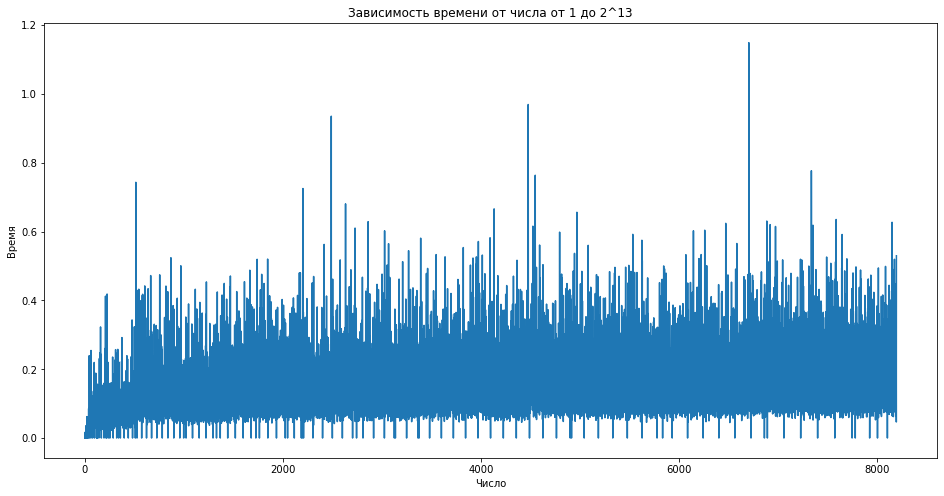

In [24]:
plt.figure(figsize=(16,8))
plt.plot(total_number_list,time_list)
plt.title('Зависимость времени от числа от 1 до 2^13')
plt.xlabel('Число')
plt.ylabel('Время')

In [62]:
big_number_time = []
big_number_list = ['~2^20','~2^25','~2^30','~2^35','~2^40','~2^45','~2^50','~2^55','~2^64','~2^70','~2^75','~2^80']
[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12] = [2^20- random.randint(1,10000),
                    2^25- random.randint(1,10000),
                    2^30-random.randint(1,100000),
                    2^35-random.randint(1,100000),
                    2^40-random.randint(1,1000000),
                    2^45-random.randint(1,1000000),
                    2^50-random.randint(1,10000000),
                    2^55-random.randint(1,10000000),
                    2^64-random.randint(1,10000000),
                    2^70-random.randint(1,100000000),
                    2^75-random.randint(1,100000000),
                    2^80-random.randint(1,1000000000)]
for i in [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12]:
    start_time = time.time()
    aks(i)
    final_time = time.time() - start_time
    big_number_time.append(final_time)

Text(0, 0.5, 'Время')

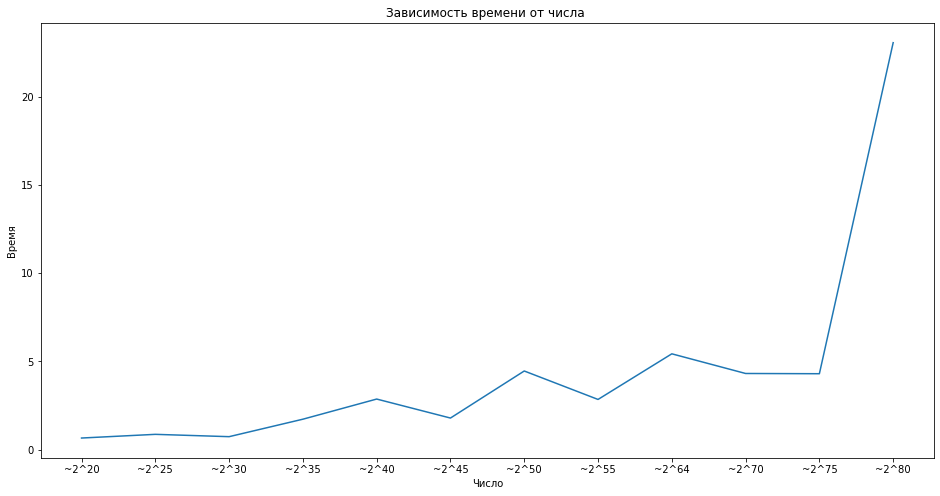

In [97]:
plt.figure(figsize=(16,8))
plt.plot(big_number_list,big_number_time)
plt.title('Зависимость времени от числа ')
plt.xlabel('Число')
plt.ylabel('Время')

In [93]:
list_log = [(math.log(x,2))^(21/2) for x in [2^20,2^25,2^30,2^35,2^40,2^45,2^50,2^55,2^64,2^70,2^75,2^80]]

Text(0, 0.5, 'Время')

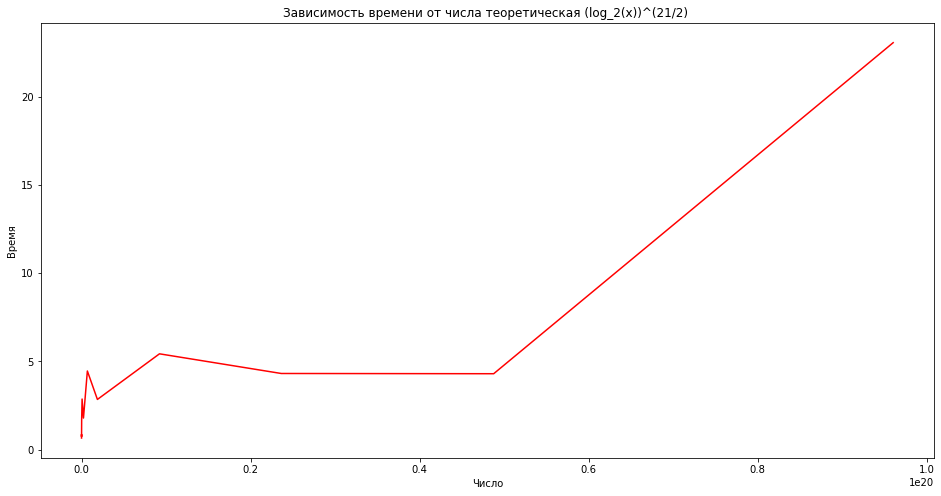

In [99]:
plt.figure(figsize=(16,8))
plt.plot(list_log,big_number_time, c = 'r')
plt.title('Зависимость времени от числа теоретическая (log_2(x))^(21/2) ')
plt.xlabel('Число')
plt.ylabel('Время')

In [21]:
hey = random_prime(2^20-1,False,2^19)
hey

616933

In [27]:
%%timeit
aks(hey)

1.45 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
aks(hey)

'Число простое'

In [29]:
hey2 = random_prime(2^22-1,False,2^21)
hey2

3704387

In [30]:
%%timeit
aks(hey2)

2.33 s ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
hey3 = random_prime(2^26-1,False,2^25)
hey3

43230853

In [32]:
%%timeit
aks(hey3)


4.82 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
hey4 = random_prime(2^30-1,False,2^29)
hey4

1014252937

In [35]:
%%timeit
aks(hey4)

17.3 s ± 420 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
hey5 = random_prime(2^36-1,False,2^35)
hey5

37347203191

In [38]:
%%timeit
aks(hey5)

36.3 s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
log(2^80-1231232123834,21/2)

log(1208925819613397942582342)/log(21/2)